# COMPUTER ASSIGNMENT 02

## PART 1


**Implement 2D convolution using Python. Complete the following tasks:**
1. Write a 2D convolution function **CONV2**. The inputs of this function should be an image array and a filter array, and the output should be the convolved image. Your output image should have a size equal to the original image (similar to the “SAME” option of MATLAB conv2 function). For simplicity, you can assume the filter has an odd length in both horizontal and vertical dimensions and has an origin at the center. Also you can assume pixel values are zero outside the original input image.
2. Write a main function, which will call the convolution function from **part 1)** to filter a given image with a given filter. The program should show the original image and the filtered image (**make sure to normalize the output image to lie between 0-255**). The program will also calculate and display the magnitude of Fourier transform of the original and filtered image, as well as frequency response of the filter. (In Python, you can use fft2() in numpy package)
3. Using your main program to filter an image with the following three filters:
![](Q_FIGURES/F1.png)

**NOTE**

- The input to the convolution function should a single channel image (e.g. gray scale).
- Your main program can be flexible. You may allow both color and gray image as input, but if the input is color, you convert it to gray. You can use the fft2( ) function to calculate the Fourier transform and freq response. 


In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import time

In [49]:
def conv2(img,kernel):
    # ZERO PADDING THE ORIGINAL IMAGE 
    # so that the convolved image can be obtained by sliding the flipped kernel over the padded image
    
    m = int(kernel.shape[1]/2) # floor half of kernel width
    n = int(kernel.shape[0]/2) # floor half of kernal height
    c_pad = np.zeros((img.shape[0],m))# COLUMN PAD
    r_pad = np.zeros((n,img.shape[1]+(2*m)))# ROW PAD
        
    ##########################################    [TODO 1]    ##########################################
    # Pad zreos on the other boundaries
    # Pad column first
    img_padded = np.hstack((c_pad,img)) # pad zeros on the left boundary
    img_padded = np.hstack((img_padded,c_pad))
    img_padded = np.vstack((r_pad,img_padded))
    img_padded = np.vstack((img_padded,r_pad))
        
    # FLIP the filter KERNEL
    ##########################################    [TODO 2]    ##########################################

    kernel = np.fliplr(kernel)
    kernel = np.flipud(kernel)
    
    # Creating a new image of zeros with the same size as the input
    ##########################################    [TODO 3]    ##########################################
    img_final = np.zeros([img.shape[0],img.shape[1]])
    img_final = img_final.astype(float) 
        
    # Perform convolution
    # Hint: you should go through a loop to compute the value of each pixel of the convolved image
    ##########################################    [TODO 4]    ##########################################
    for i in range (n, n+img.shape[0]):
        for j in range (m, m+img.shape[1]):
            img_final[i-n,j-m] = np.sum(kernel*img_padded[i-n:i+n+1, j-m:j+m+1])
    
    # RETURN CONVOLVED IMAGE
    return img_final
    

In [83]:
def main(img,KERNEL):
    
    # FUNCTION CALL TO CONV2 PASSING THE IMG AND KERNEL AS INPUT ARGUMENTS
    img_output = conv2(img,KERNEL)
    
    # to normalize the output to lie between 0-1
    img_output = (img_output-np.min(img_output))/(np.max(img_output)-np.min(img_output))
    
    ##########################################    [TODO 5]    ##########################################
    # You should save this image to disk, and submit it as a part of your assignment
    outName = "output_image" + time.strftime("%Y%m%d-%H%M%S") + ".jpg"
    cv2.imwrite(outName,img_output*255)
    
    # SHOW ORIGINAL AND FILTERED IMAGE
    
    e,flt = plt.subplots(1,2,figsize=(25,25))
    flt[0].imshow(img,cmap='gray')
    flt[1].imshow(img_output,cmap='gray')
    plt.title('original image and filtered image')
        
    # CALCULATE AND DISPLAY THE FFT'S OF ORIGINAL IMAGE, CONVOLVED IMAGE AND FILTER KERNEL
    # USE THE NUMPY.FFT.FFT2()
    fft_original = np.absolute(np.fft.fftshift(np.fft.fft2(img)))
    fft_original_lg = 20*np.log(fft_original+1)
    
    ##########################################    [TODO 6]    ##########################################
    # CALCULATE AND DISPLAY THE FFT'S OF CONVOLVED IMAGE
    fft_output = np.absolute(np.fft.fftshift(np.fft.fft2(img_output)))
    fft_output_lg = 20*np.log(fft_output+1)
    
    ##########################################    [TODO 7]    ##########################################
    # CALCULATE AND DISPLAY THE FFT'S OF FILTER KERNEL
    fft_filt = np.absolute(np.fft.fftshift(np.fft.fft2(KERNEL, s=[img.shape[0], img.shape[1]])))   # Hint: you should use FFT size equal to the image size for easy comparison
    fft_filt_lg = 20*np.log(fft_filt+1)
     
    f,ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(fft_original_lg,cmap='gray') 
    ax[1].imshow(fft_output_lg,cmap='gray')
    ax[2].imshow(fft_filt_lg,cmap='gray')
    plt.title('frequency domain representation of the images and kernel')
    

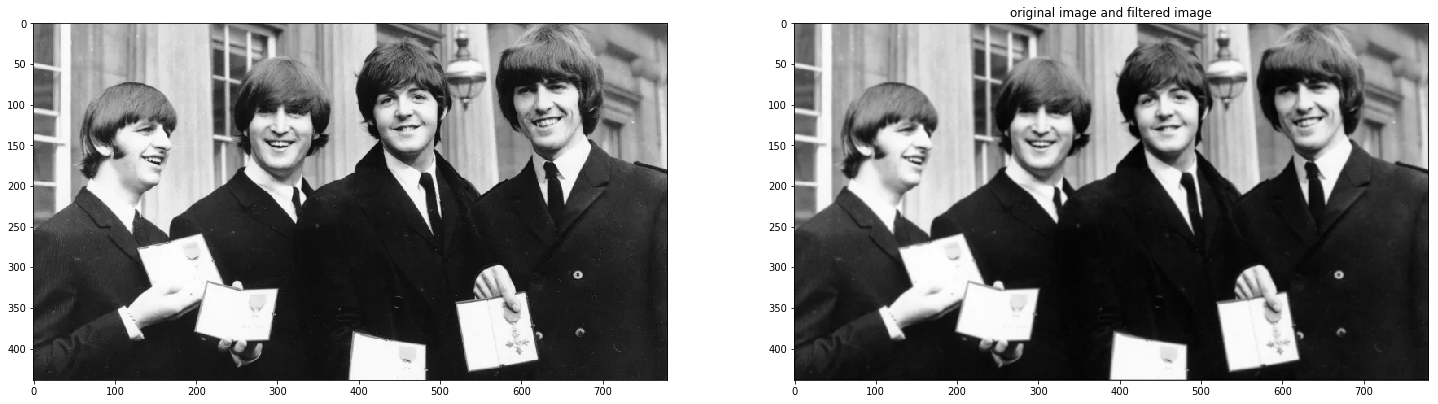

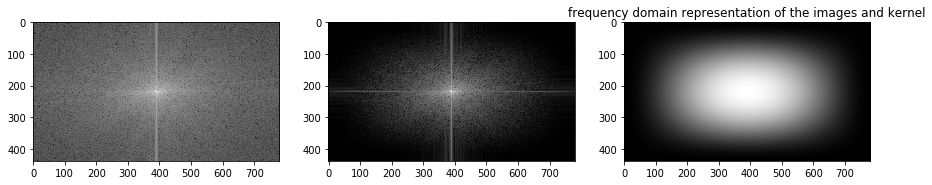

In [84]:
# function call to main()

# Read in an image. You can choose any image
file_name = 'beatles.jpg'# SPECIFY YOUR IMAGE FILE NAME
img = cv2.imread(file_name,0) # 0 for reading in black and white   
img = img.astype(float) # Convert to float before convolution

# DEFINE THE FILTER KERNEL SPECIFIED IN THE QUESTION ABOVE
KERNEL = np.array([[1,2,1],[2,4,2],[1,2,1]])/16 # FIRST KERNEL DEFINED IN THE QUESTION
main(img,KERNEL)

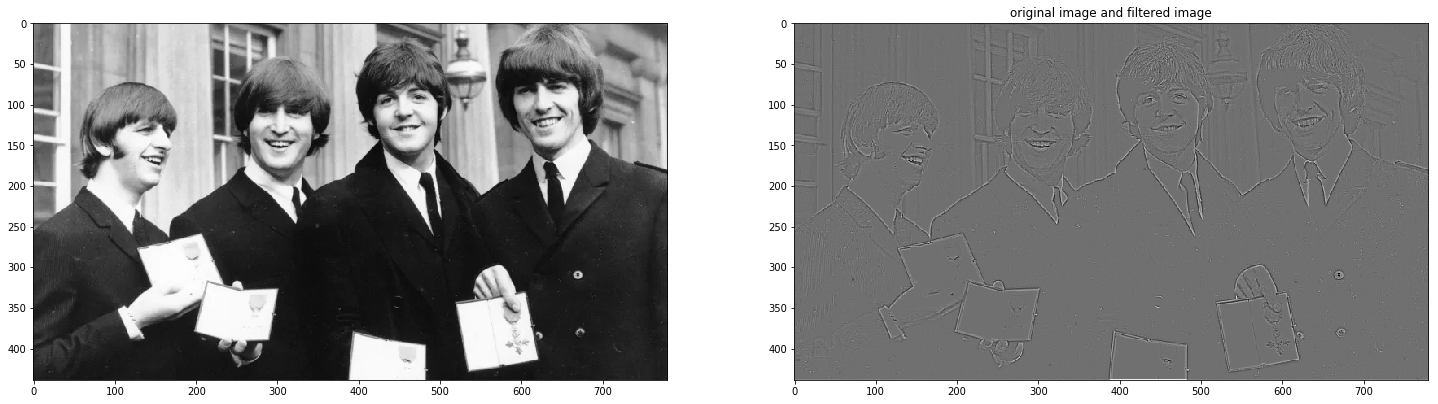

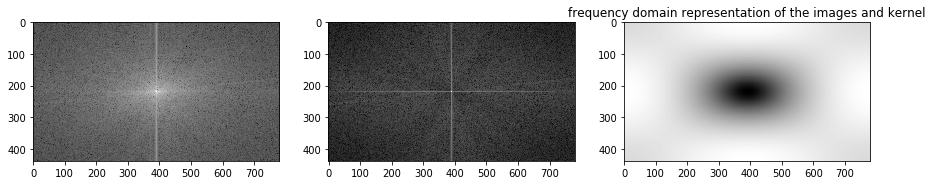

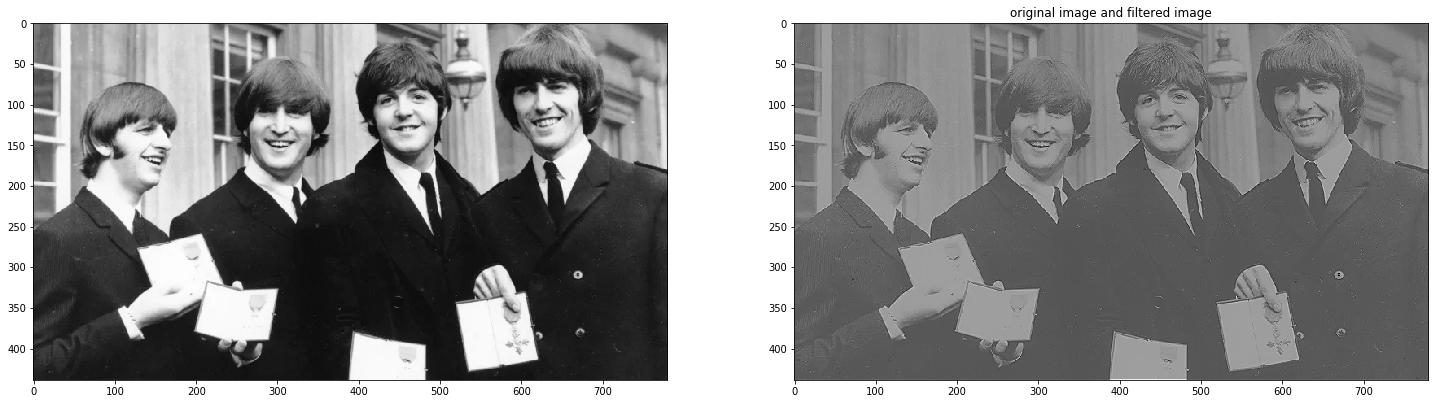

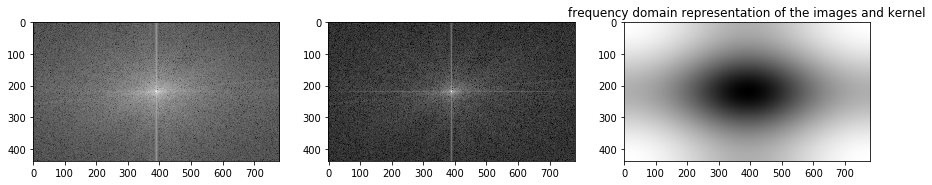

In [85]:
# Repeat for the other filter kernels
##########################################    [TODO 8]    ##########################################
KERNELs = [np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]), np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])]
for k in KERNELs:
    main(img, k)

### DISCUSSION ABOUT RESULTS
- For each filter, discuss the difference between the original and filtered image, both in the spatial and frequency domain and explain how does the filtering effect correlate with the filter and its frequency response.
- **fill in your response in the cell below**

#### discuss results here (modify this cell)
* H1 is a low pass filter which loss high freq information and blur the image
* H2, H3 is high pass filters which loss low freq infromation and extra edges
* H2 balance edge from all direction while H3 loss infromation on Horizontal and Vertical edges

## PART 2

##### **Image noise removal using averaging and Gaussian filters**
1. Create a noisy image, by adding zero mean Gaussian random noise to your image
 - In Python, the noise can be generated by using “np.random.normal($\mu$,$\sigma$,(img.shape))”
2. Apply **CONV2** to filter the noise-added image using an **average filter of size n x n**, where n=odd
3. Apply **CONV2** to filter the noise-added image using a **Gaussian filter of size n x n** (Recall that with Gaussian filter, the filter size and the Gaussian filter parameter σ should satisfy n>=5σ)
 - Try two different noise levels (0.01*255 and 0.1*255) and for each noise level different filter sizes (ex: 5x5 to 9x9 in step size of 2).

**OUTPUT**
- show the original
- noise-added
- filtered images for each combination of noise level and filter size.

** If your CONV2 function does not seem to work properly, you could use the python function cv2.filter2D  **


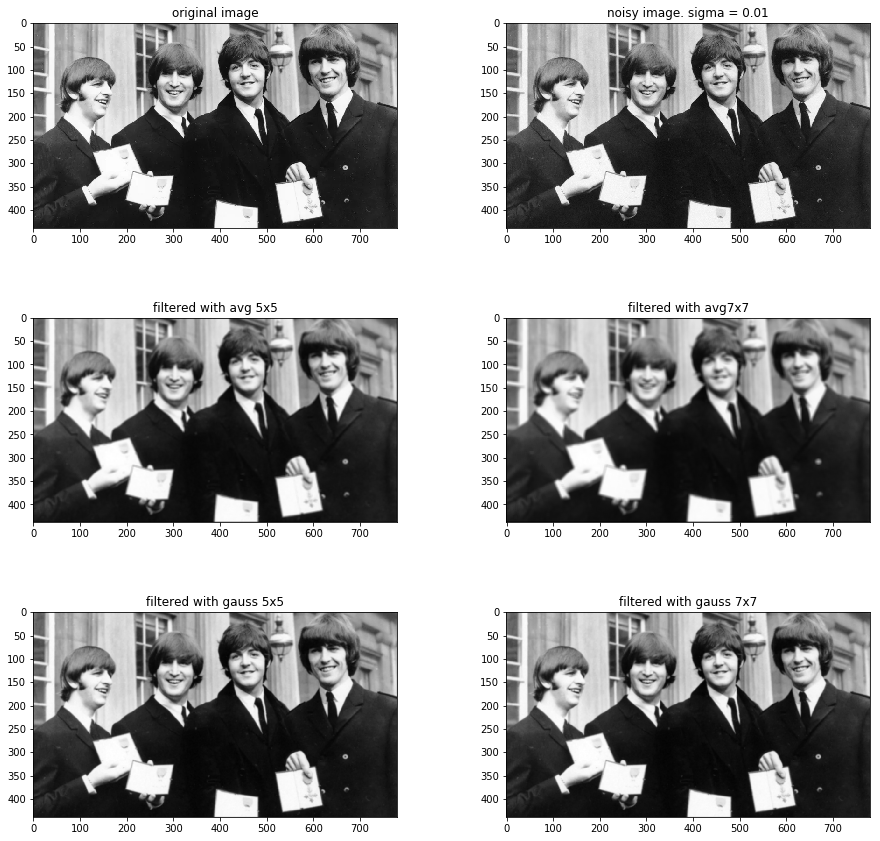

#################################################################


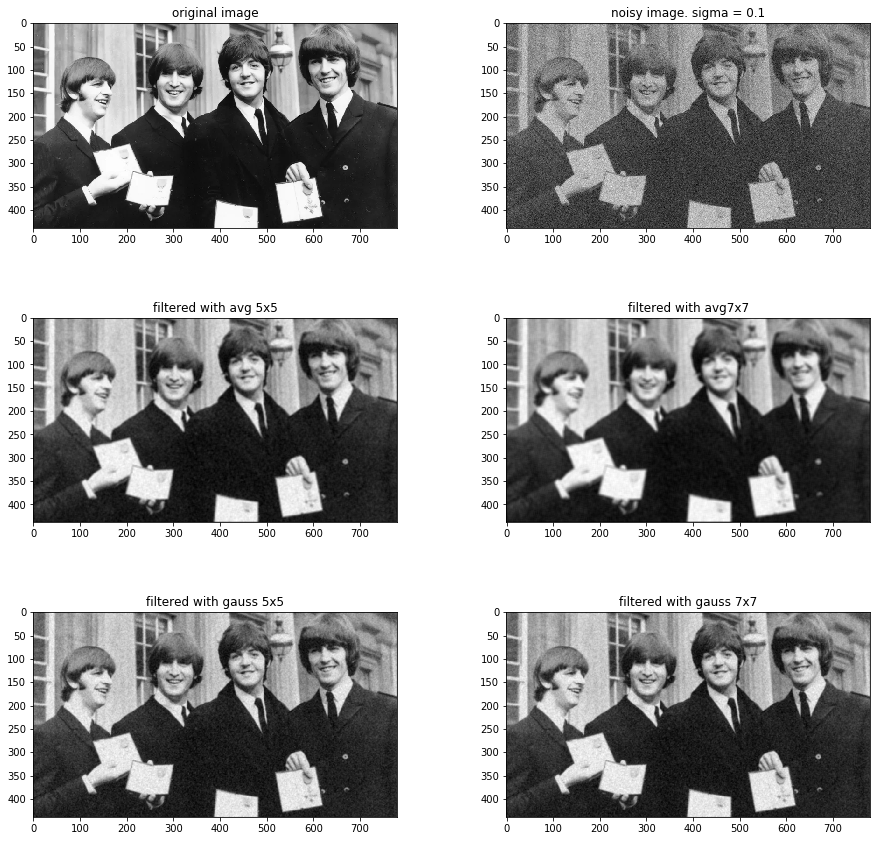

#################################################################


In [71]:
##########################################    [TODO 9]    ##########################################
file_name = 'beatles.jpg'# SPECIFY YOUR IMAGE FILE NAME
img_2 = cv2.imread(file_name,0) # 0 for reading in black and white   
img_2 = img_2.astype(float) # Convert to float before convolution

# create zero mean gaussian noise of same size as the image. noise level 0.01
n1 = np.random.normal(0,0.01,img_2.shape)*255

##########################################    [TODO 10]    ##########################################
# create zero mean gaussian noise. noise level 0.1
n2 = np.random.normal(0,0.1,img_2.shape)*255

# add generated noise to the image. create 2 noisy images with different levels of noise
img_n1 = img_2 + n1
img_n2 = img_2 + n2

# create a 5x5 AVERAGING kernel
kernel1_avg = np.ones((5,5))/25

##########################################    [TODO 11]    ##########################################
# create a 7x7 AVERAGING kernel
# kernel2_avg = ...
kernel2_avg = np.ones((7,7))/49

# CREATING a 5X5 GAUSSIAN KERNEL
x = np.arange(-2, 3, 1)
y = np.arange(-2, 3, 1)
x2d, y2d = np.meshgrid(x, y)
sigma = 1
kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2) # unit integral
kernel_2d = kernel_2d/np.sum(kernel_2d) 
kernel1_gaus = kernel_2d

##########################################    [TODO 12]    ##########################################
# CREATE 7X7 GAUSSIAN KERNEL
# kernel2_gaus = 
x = np.arange(-3, 4, 1)
y = np.arange(-3, 4, 1)
x2d, y2d = np.meshgrid(x, y)
sigma = 1
kerne2_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
kerne2_2d = kerne2_2d / (2 * np.pi * sigma ** 2) # unit integral
kerne2_2d = kerne2_2d/np.sum(kerne2_2d) 
kernel2_gaus = kerne2_2d


# function call to conv2 with 5x5 averaging filter. noise level 0.01
output_n1_avg1 = conv2(img_n1,kernel1_avg)

##########################################    [TODO 13]    ##########################################
# function call to conv2 with 7x7 averaging filter. noise level 0.01
output_n1_avg2 = conv2(img_n1,kernel2_avg)

# function call to conv2 with 5x5 gaussian filter. noise level 0.01
output_n1_gaus1 = conv2(img_n1,kernel1_gaus)
output_n1_gaus2 = conv2(img_n1,kernel2_gaus)

# Repeat for noisy image with noise level 0.1
##########################################    [TODO 14]    ##########################################
output_n2_avg1 = conv2(img_n2,kernel1_avg)
output_n2_avg2 = conv2(img_n2,kernel2_avg)
output_n2_gaus1 = conv2(img_n2,kernel1_gaus)
output_n2_gaus2 = conv2(img_n2,kernel2_gaus)

def plotCompare(img_o, img_n, img_avg1, img_avg2, img_gaus1, img_gaus2, sigma):
    
    f,ax = plt.subplots(3,2,figsize = (15,15))
    ax[0,0].imshow(img_o,cmap='gray')
    ax[0,0].set_title('original image')
    ax[0,1].imshow(img_n,cmap='gray')
    ax[0,1].set_title('noisy image. sigma = '+ str(sigma))
    ax[1,0].imshow(img_avg1,cmap='gray')
    ax[1,1].imshow(img_avg2,cmap='gray')
    ax[2,0].imshow(img_gaus1,cmap='gray')
    ax[2,1].imshow(img_gaus2,cmap='gray')
    ax[1,0].set_title('filtered with avg 5x5')
    ax[1,1].set_title('filtered with avg7x7')
    ax[2,0].set_title('filtered with gauss 5x5')
    ax[2,1].set_title('filtered with gauss 7x7')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()
    print('#################################################################')

plotCompare(img_2, img_n1, output_n1_avg1, output_n1_avg2, output_n1_gaus1, output_n1_gaus2, 0.01)
    
##########################################    [TODO 15]    ##########################################
# PLOT THE INPUT, THE NOISY IMAGE AND THE OUTPUT OBTAINED BY DENOISING THE IMAGE WITH NOISE(SIGMA=0.1)
plotCompare(img_2, img_n2, output_n2_avg1, output_n2_avg2, output_n2_gaus1, output_n2_gaus2, 0.1)


### DISCUSSION ABOUT THE RESULTS
**Comment on for each noise level, which filter size is best for each filter and how does the two filters compare in their noise removal capability.**

#### Discuss results here.(modify this cell)

* avg filter denoise better as size increase but blur the image to much
* gaussian filter denoise better and does not blur the image significantly
* For sigma = 0.01, Gaussian 5x5 works best and for 0.1, Gaussian 7x7 works best

## Submission Instructions

- Please submit two files in NYUclasses as two separate attachment:
 - A pdf version of the notebbok (that includes the results/figures and comments you have for any results)
 - A zip file including all following files named **your-last-name-CA01**
     - The python notebook as a _.ipynb_ file with the name as **your-last-name-CA01** 
     - Add all the saved images in a folder named _output-images_